In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
seed = 42 

In [2]:
# Load the raw data
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df_1 = df.drop(["Effective To Date"], axis=1)
df_1.set_index("Customer", inplace=True)

df_1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Scale the data

In [5]:
# Scale the numeric features 
df_numeric = df_1.select_dtypes(include=["int", "float"])
numeric_cols = df_numeric.columns

scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

df_numeric_scaled

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


In [8]:
# Replace the unscaled numeric features with the newly scaled features
df_1.drop(numeric_cols, axis=1)
df_1_ss = pd.concat([df_1, df_numeric_scaled], )

## Encode the categorical features

In [9]:
# Encode the categorical features 
df_1 = pd.get_dummies(df_1, dtype='int')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Income                          9134 non-null   int64  
 2   Monthly Premium Auto            9134 non-null   int64  
 3   Months Since Last Claim         9134 non-null   int64  
 4   Months Since Policy Inception   9134 non-null   int64  
 5   Number of Open Complaints       9134 non-null   int64  
 6   Number of Policies              9134 non-null   int64  
 7   Total Claim Amount              9134 non-null   float64
 8   State_Arizona                   9134 non-null   int32  
 9   State_California                9134 non-null   int32  
 10  State_Nevada                    9134 non-null   int32  
 11  State_Oregon                    9134 non-null   int32  
 12  State_Washington              

## Split the data into training and test

In [10]:
X = df_1.drop("Customer Lifetime Value", axis=1)
y = df_1['Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

## Run RFE using linear regression

In [11]:
lr = LinearRegression()

rfe_lr = RFE(estimator=lr, n_features_to_select=20)

rfe_lr.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [12]:
rfe_lr_table = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_lr.ranking_,
    'Selection': rfe_lr.support_
})

rfe_lr_table.sort_values(by='Ranking')

,Feature,Ranking,Selection
63,Vehicle Size_Small,1,True
44,Policy_Special L1,1,True
47,Renew Offer Type_Offer1,1,True
37,Policy Type_Special Auto,1,True
48,Renew Offer Type_Offer2,1,True
62,Vehicle Size_Medsize,1,True
49,Renew Offer Type_Offer3,1,True
50,Renew Offer Type_Offer4,1,True
45,Policy_Special L2,1,True
16,Coverage_Premium,1,True


In [16]:
# Get the error from the test set
y_preds_lr = rfe_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_preds_lr)
print("LR RMSE: ", np.sqrt(mse_lr))

LR RMSE:  6623.739079915888


## Run RFE using Random Forest Regressor

In [17]:
# RFE using RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=20)

rfe_rfr = RFE(estimator=rfr, n_features_to_select=20)

rfe_rfr.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=20), n_features_to_select=20)

In [18]:
rfe_rfr_table = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_rfr.ranking_,
    'Selection': rfe_rfr.support_
})

rfe_rfr_table.sort_values(by='Ranking')

,Feature,Ranking,Selection
0,Income,1,True
52,Sales Channel_Branch,1,True
51,Sales Channel_Agent,1,True
48,Renew Offer Type_Offer2,1,True
47,Renew Offer Type_Offer1,1,True
43,Policy_Personal L3,1,True
42,Policy_Personal L2,1,True
33,Marital Status_Married,1,True
62,Vehicle Size_Medsize,1,True
27,Gender_F,1,True


In [19]:
# Get the error from the test set
y_preds_rfr = rfe_rfr.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_preds_rfr)
print("RFR RMSE: ", np.sqrt(mse_rfr))

RFR RMSE:  3908.0371186846055


## Run RFE using XGBoost Regressor

In [21]:
# Run RFE with XGBRegressor
xgbr = XGBRegressor()

rfe_xgbr = RFE(estimator=xgbr, n_features_to_select=20)
rfe_xgbr.fit(X_train, y_train)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None,
                           early_stopping_rounds=None, enable_categorical=False,
                           eval_metric=None, feature_types=None, gamma=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, multi_strategy=None,
                           n_estimators=None, n_jobs=None,
                           num_parallel_tree=None, random_state=None, ...),
    n_features_to_select=20)

In [22]:
rfe_xgbr_table = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_xgbr.ranking_,
    'Selection': rfe_xgbr.support_
})

rfe_xgbr_table.sort_values(by='Ranking')

,Feature,Ranking,Selection
31,Location Code_Urban,1,True
32,Marital Status_Divorced,1,True
21,Education_Master,1,True
20,Education_High School or Below,1,True
35,Policy Type_Corporate Auto,1,True
48,Renew Offer Type_Offer2,1,True
14,Coverage_Basic,1,True
24,EmploymentStatus_Medical Leave,1,True
52,Sales Channel_Branch,1,True
54,Sales Channel_Web,1,True


In [23]:
# Get the error from the test set
y_preds_xgbr = rfe_xgbr.predict(X_test)

mse_xgbr = mean_squared_error(y_test, y_preds_xgbr)
print("XGBR RMSE: ", np.sqrt(mse_xgbr))

XGBR RMSE:  4174.426874748314


## Plot the predictions

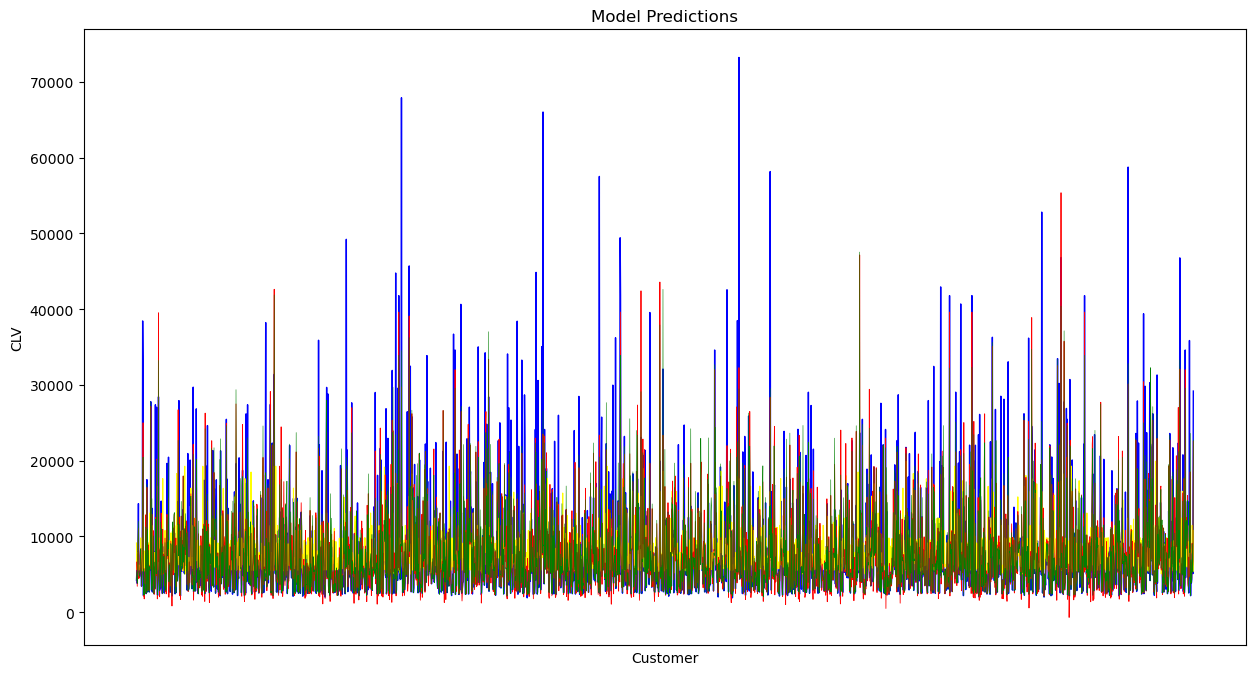

In [42]:
# Plot the predictions from each model
plt.figure(figsize=(15, 8))
plt.plot(X_test.index, y_test, color="blue", linewidth=1.0, label="Actual")
plt.plot(X_test.index, y_preds_lr, color="yellow", linewidth=0.8, label="Linear Regression")
plt.plot(X_test.index, y_preds_xgbr, color="red", linewidth=0.6, label="XGBoost Regressor")
plt.plot(X_test.index, y_preds_rfr, color="green", linewidth=0.4, label="Random Forest Regressor")

plt.title("Model Predictions")
plt.xlabel("Customer")
plt.ylabel("CLV")
plt.xticks(ticks=[], labels=None)
plt.show()

In [48]:
# Compare mean absolute percentage error
mape_lr = mean_absolute_percentage_error(y_test, y_preds_lr)
mape_rfr = mean_absolute_percentage_error(y_test, y_preds_rfr)
mape_xgbr = mean_absolute_percentage_error(y_test, y_preds_xgbr)

print("LR MAPE: ", mape_lr)
print("RFR MAPE: ", mape_rfr)
print("XGBR MAPE: ", mape_xgbr)

LR MAPE:  0.6139105633711058
RFR MAPE:  0.1003388723481199
XGBR MAPE:  0.20275204642457975
